In [2]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

In [51]:
data = pd.read_csv("VLagun_Total_Years4.csv")
X = data.iloc[:, 0:57]
y = data.iloc[:, 57]
features_names = data.columns
data.head()

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Polyarthra vulgaris,Polyarthra platyptera,Pompholyx sp.,Synchaeta sp.,Trichocerca pusilla,Trichocerca similis,Years
0,3.757624,9.46,18.3,52.0,3.5,11.7,185.0,0.039,0.022,0.551,...,0.8920,0.2714,0.0000,0.0313,0.0,0.0000,0.0000,0.0045,0.0009,0
1,3.504707,9.89,19.1,50.0,4.4,17.5,111.3,0.020,0.025,0.123,...,0.0640,0.0464,0.0000,0.0111,0.0,0.0000,0.0437,0.0041,0.0020,0
2,3.757624,9.66,18.1,59.0,3.2,22.8,103.4,0.016,0.008,0.582,...,0.0270,0.0186,0.0000,0.0000,0.0,0.0000,0.0000,0.0028,0.0027,0
3,3.107266,10.36,19.5,46.0,4.3,22.3,92.7,0.026,0.021,0.693,...,0.3306,0.2084,0.0000,0.0000,0.0,0.0167,0.0000,0.0099,0.0103,0
4,2.619498,11.56,19.0,42.0,11.7,30.3,73.2,0.022,0.048,0.383,...,0.1502,0.1343,0.0159,0.0000,0.0,0.0058,0.0000,0.0112,0.0021,0


In [43]:
X

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,Filinia longiseta,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Polyarthra vulgaris,Polyarthra platyptera,Pompholyx sp.,Synchaeta sp.,Trichocerca pusilla,Trichocerca similis
0,3.757624,9.46,18.3,52.00,3.5,11.7,185.0,0.039,0.022,0.551,...,1.3152,0.8920,0.2714,0.0000,0.0313,0.0,0.0000,0.0000,0.0045,0.0009
1,3.504707,9.89,19.1,50.00,4.4,17.5,111.3,0.020,0.025,0.123,...,0.0769,0.0640,0.0464,0.0000,0.0111,0.0,0.0000,0.0437,0.0041,0.0020
2,3.757624,9.66,18.1,59.00,3.2,22.8,103.4,0.016,0.008,0.582,...,0.0426,0.0270,0.0186,0.0000,0.0000,0.0,0.0000,0.0000,0.0028,0.0027
3,3.107266,10.36,19.5,46.00,4.3,22.3,92.7,0.026,0.021,0.693,...,0.1796,0.3306,0.2084,0.0000,0.0000,0.0,0.0167,0.0000,0.0099,0.0103
4,2.619498,11.56,19.0,42.00,11.7,30.3,73.2,0.022,0.048,0.383,...,0.0298,0.1502,0.1343,0.0159,0.0000,0.0,0.0058,0.0000,0.0112,0.0021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4.500000,9.93,16.3,117.50,23.9,30.3,191.5,0.033,0.029,0.406,...,0.0191,0.0106,0.0034,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
116,4.600000,10.02,16.2,115.00,31.4,32.4,37.8,0.024,0.024,0.549,...,0.0617,0.0143,0.0011,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
117,4.500000,9.93,16.3,113.75,7.1,20.6,223.2,0.021,0.032,0.482,...,0.0364,0.0113,0.0004,0.0008,0.0000,0.0,0.0000,0.0000,0.0000,0.0000
118,4.200000,10.30,16.0,102.50,19.5,58.8,97.1,0.027,0.048,0.572,...,0.0467,0.0173,0.0010,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000


In [44]:
y

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: Years, Length: 120, dtype: int64

In [25]:
print("Features Shape: ", data.shape)

Features Shape:  (120, 58)


In [26]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [27]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X,y)

importances = rf.feature_importances_

for feature, importance in zip(X.columns, importances):
    np.argsort(importance)
    print(feature, importance)

PSU 0.004214574723880055
O2 0.0011765610931609677
temp. 0.006976755176039585
SS 0.02924529027348141
SRP 0.00030803456832377866
DOP 0.0024234336490718328
PP 0.0016105487625103284
NH4N 0.001761487944788838
NO3N 0.006881258996672309
DON 0.0009651528364831198
PN 0.0016164100218396917
TN/TP 0.0009246496493048396
Fe 0.011251901061469683
SiO4Si 0.038869240168092595
DOC 0.04927263175989809
TPOC 0.0
Windspeedinsitu 0.12328625870027249
Depth 0.0006207202078277379
DINtoDIP 0.0011665662962273135
Cyanobacteria 0.04612114864177478
Chlorophyceae 0.014029110259792397
Euglenophyceae 0.003417478761570994
Diatomophyceae 0.2650869521535383
Flagellata    0.00032662134039500795
Dinoflagellata  0.12331194733873102
Cryptophytes 0.0028781378362538993
picophytoplankton 0.005267808163041838
Bosmina longirostris 0.0021433911949064435
Ceriodaphnia sp. 0.0
Diaphanosoma brachyurum  0.009963460860312684
Leptodora kindtii 0.0
Acartia longiremis 0.0
Acartia tonsa 0.00032757637355405856
Eurytemora affinis 0.0
Cyclops sp

In [28]:
importances - list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(X, importances)]

feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse= True)

[print('Variable {:31} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable Diatomophyceae                  Importance: 0.265
Variable Filinia longiseta               Importance: 0.165
Variable Windspeedinsitu                 Importance: 0.123
Variable Dinoflagellata                  Importance: 0.123
Variable DOC                             Importance: 0.049
Variable Cyanobacteria                   Importance: 0.046
Variable SiO4Si                          Importance: 0.039
Variable SS                              Importance: 0.029
Variable Brachionus angularis            Importance: 0.027
Variable Keratella cochlearis f.tecta    Importance: 0.024
Variable Chlorophyceae                   Importance: 0.014
Variable Fe                              Importance: 0.011
Variable Diaphanosoma brachyurum         Importance: 0.01
Variable temp.                           Importance: 0.007
Variable NO3N                            Importance: 0.007
Variable picophytoplankton               Importance: 0.005
Variable Trichocerca pusilla             Importance: 0.00

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import ensemble, tree, metrics

In [30]:
estimator_rf = ensemble.RandomForestRegressor(
    n_jobs=-1,
    n_estimators=100,
    random_state=42)

In [31]:
estimator_rf.fit(X, y)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [32]:
feature_importance_df = pd.DataFrame(estimator_rf.feature_importances_, index=X.columns.values, columns=['Importance'])
feature_importance_df.all()

Importance    False
dtype: bool

In [33]:
feature_importance_df.sort_values(by='Importance', inplace=True, ascending=False)

<Axes: >

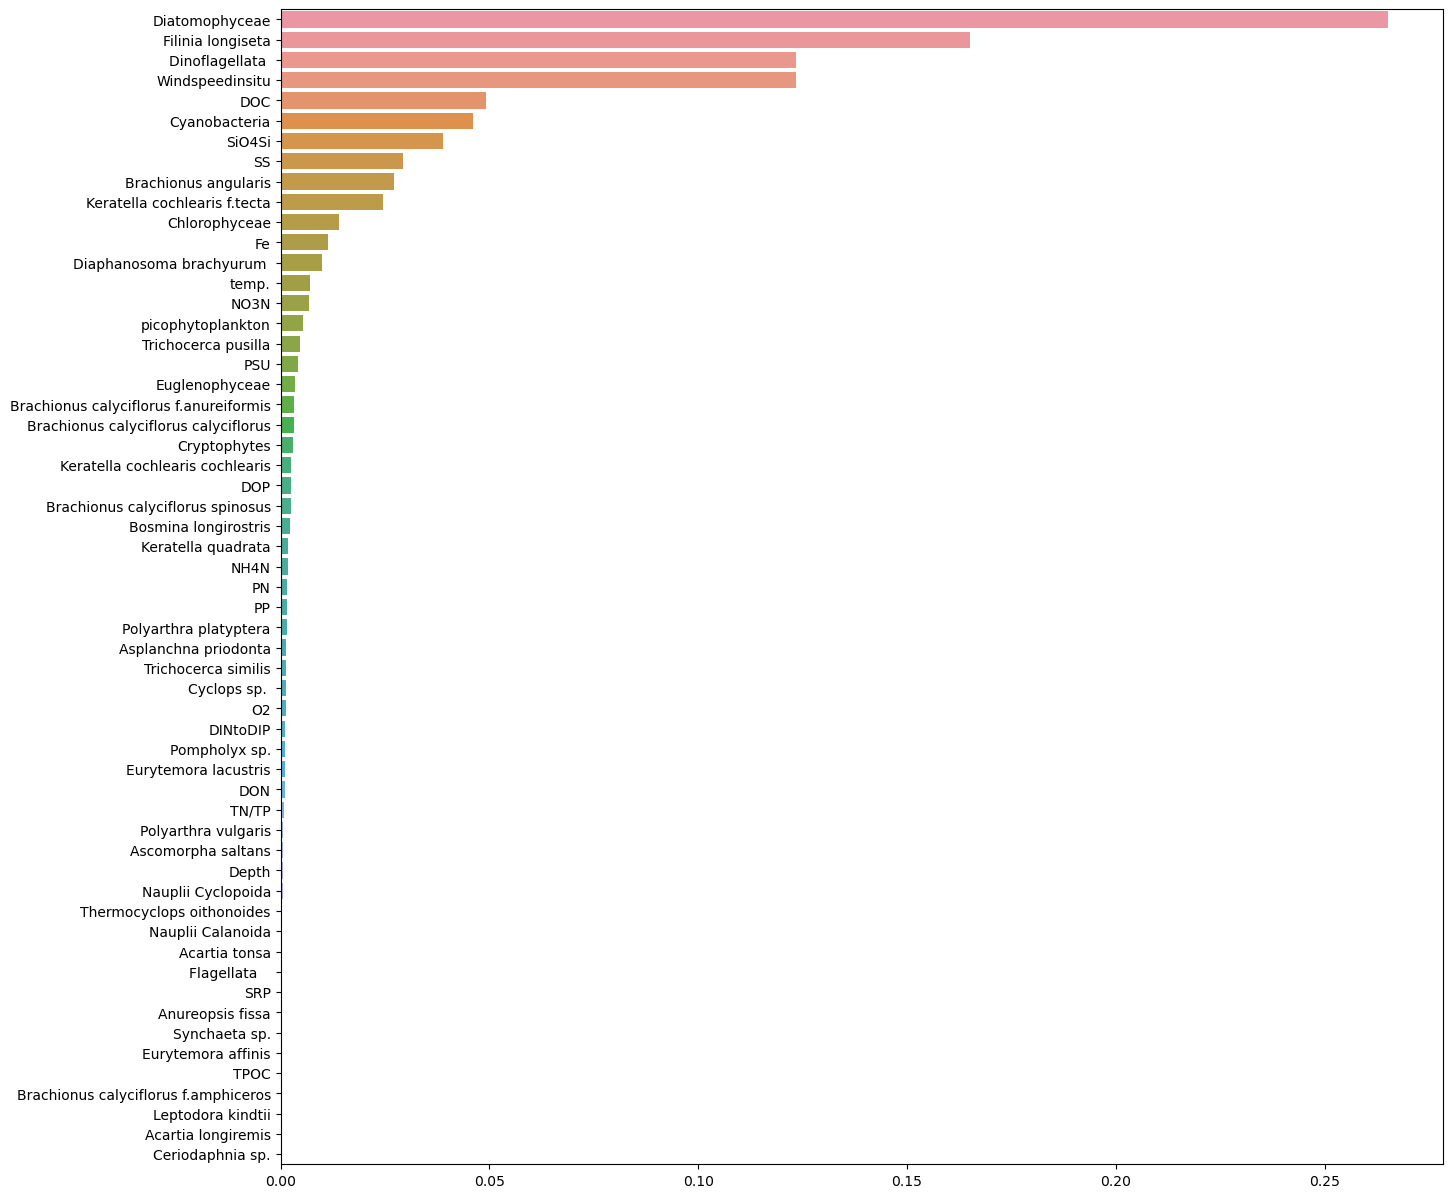

In [34]:
plt.figure(figsize=(15,15))
sns.barplot(data=feature_importance_df, x=feature_importance_df.values.flatten(), y=feature_importance_df.index.values)